In this notebook, I’ll demonstrate some simple data analysis using the Python Data Analysis Library *pandas.*

For the dataset, I’ll use the stock price history for *Microsoft Corporation (NASDAQ: MSFT)* from Jan. 01, 1991 through Dec. 31, 2016. This dataset will be downloaded from *Yahoo! Finance* using the *pandas_datareader* module.

In [1]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime
%matplotlib inline

Let's define the start and end points as Jan. 01, 1991 and Dec. 31, 2016, respectively.

In [2]:
start, end = datetime(1991, 1, 1), datetime(2016, 12, 31)

In [3]:
start, end

(datetime.datetime(1991, 1, 1, 0, 0), datetime.datetime(2016, 12, 31, 0, 0))

Download the data from *Yahoo! Finance* into a DataFrame

In [4]:
msft_history = data.get_data_yahoo('MSFT', start, end).round(2).sort_index(ascending=False)

In [5]:
msft_history.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-30,62.96,62.99,62.03,62.14,61.41,25579900
2016-12-29,62.86,63.20,62.73,62.90,62.16,10250600
2016-12-28,63.40,63.40,62.83,62.99,62.25,14653300
2016-12-27,63.21,64.07,63.21,63.28,62.54,11763200
2016-12-23,63.45,63.54,62.80,63.24,62.50,12398000


In [6]:
msft_history.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-01-08,1.04,1.05,1.01,1.02,0.69,76438400
1991-01-07,1.05,1.08,1.04,1.04,0.70,87552000
1991-01-04,1.04,1.06,1.04,1.05,0.71,58483200
1991-01-03,1.04,1.06,1.04,1.05,0.70,52822400
1991-01-02,1.04,1.05,1.04,1.04,0.70,38105600


Now that we have the dataset, let’s perform some simple data analysis.
<br><br>

Let’s find the highest and lowest prices for MSFT’s stock for each year in the dataset.

In [7]:
# Group by year and get the highest stock price for each year
year_highest = msft_history.groupby(msft_history.index.year).max()['High']

# Group by year and get the lowest stock price for each year
year_lowest = msft_history.groupby(msft_history.index.year).min()['Low']

In [8]:
year_highest.head(5)

Date
1991    2.33
1992    2.97
1993    3.06
1994    4.07
1995    6.83
Name: High, dtype: float64

In [9]:
year_lowest.head(5)

Date
1991    1.01
1992    2.05
1993    2.20
1994    2.44
1995    3.64
Name: Low, dtype: float64

Combine the two series above into a single Dataframe.

In [10]:
annual_highest_lowest = pd.concat([year_highest, year_lowest], axis=1)
annual_highest_lowest.tail()

,High,Low
Date,,
2012,32.95,26.26
2013,38.98,26.28
2014,50.05,34.63
2015,56.85,39.72
2016,64.10,48.04


Thus, we can see the highest and lowest prices of the stock for each year. For example, in 2013, MSFT’s stock traded for as high as \$38.98 and for as low as \$26.28.
<br><br>
Let’s plot this to get a graphical  representation.

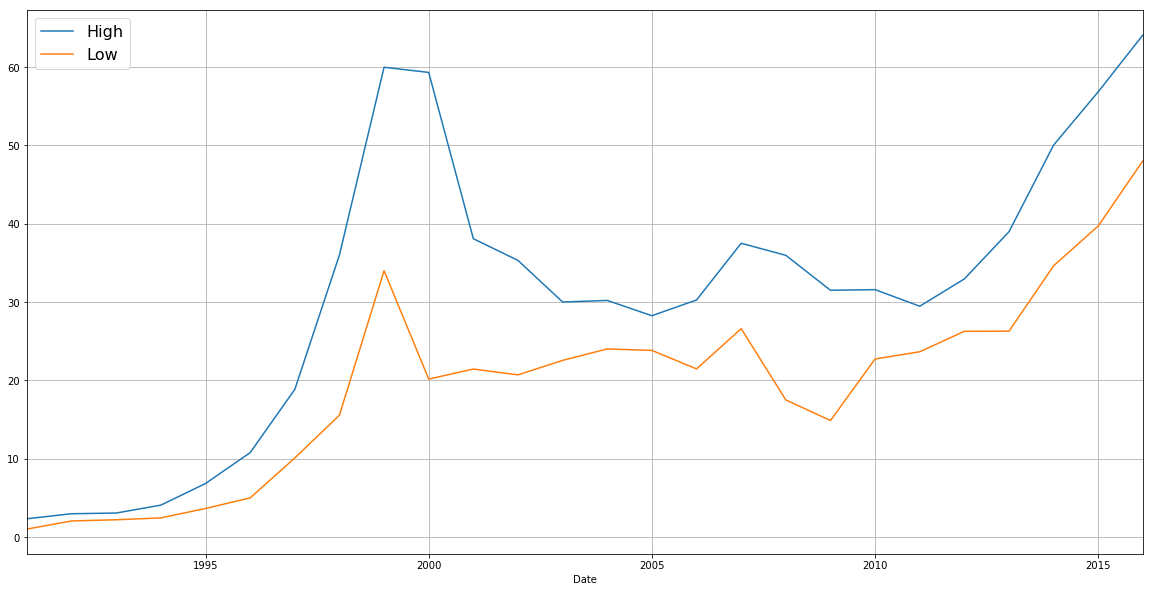

In [11]:
annual_highest_lowest.plot(grid=True, figsize=(20,10)).legend(loc=2,prop={'size':16})